# ML Analysis
Will attempt to do some sort of clustering.
## Set up Environment

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# vectorizing the book info column using TFidf Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
path = os.path.join(os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/data/")

In [3]:
os.listdir(path + 'cleaned')

['.DS_Store',
 'BX-Books.csv',
 'BX-Ratings.csv',
 'BX-Users.csv',
 'BX-NewBooksRatings.csv',
 '.ipynb_checkpoints']

## Pull in required data:

In [65]:
books = pd.read_csv(path + 'cleaned/BX-Books.csv')
users = pd.read_csv(path + 'cleaned/BX-Users.csv')
ratings = pd.read_csv(path + 'cleaned/BX-Ratings.csv')

In [66]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector
0,0002005018,clara callan,richard bruce wright,2001.0,harperflamingo canada,clara callan by richard bruce wright,[0. 0. 0. ... 0. 0. 0.]
1,0374157065,flu story great influenza pandemic 1918 search...,gina bari kolata,1999.0,farrar straus giroux,flu story great influenza pandemic 1918 search...,[0. 0. 0. ... 0. 0. 0.]
2,0399135782,kitchen god wife,amy tan,1991.0,putnam pub group,kitchen god wife by amy tan,[0. 0. 0. ... 0. 0. 0.]
3,0440234743,testament,john grisham,1999.0,dell,testament by john grisham,[0. 0. 0. ... 0. 0. 0.]
4,0452264464,beloved plume contemporary fiction,toni morrison,1994.0,plume,beloved plume contemporary fiction by toni mor...,[0. 0. 0. ... 0. 0. 0.]


In [67]:
tf = TfidfVectorizer(analyzer = "word", ngram_range=(1,2), min_df=0, stop_words='english')

In [68]:
tfidf_vectors = tf.fit(books['Book-Info'])

In [69]:
book_vector = tfidf_vectors.transform(books['Book-Info']).toarray()

In [70]:
books['Book-Vector'] = list(book_vector)

## Clustering:

In [71]:
ratings = ratings.merge(users).merge(books)

In [72]:
ratings = ratings.dropna()

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [106]:
ratings.head(1)

,User-ID,ISBN,Book-Rating,Unnamed: 0,User-City,User-State,User-Country,User-Age,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,cluster
0,276744,038550120X,7,47901,torrance,california,usa,62.0,painted house,john grisham,2001.0,doubleday,painted house by john grisham,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3


In [116]:
preprocessor = ColumnTransformer([
    ('text', TfidfVectorizer(), 'Book-Info'),  # Replace 'text_feature' with your text column
    ('numeric', StandardScaler(), ['User-Age'])  # Replace 'numeric_feature' with your numeric column
])

In [117]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KMeans(n_clusters = 4, init = 'k-means++', random_state = 1))
])

In [118]:
from sklearn.cluster import KMeans

In [119]:
model.fit(ratings)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'Book-Info'),
                                                 ('numeric', StandardScaler(),
                                                  ['User-Age'])])),
                ('classifier', KMeans(n_clusters=4, random_state=1))])

In [120]:
ratings['cluster'] = model.named_steps['classifier'].labels_

In [121]:
ratings.head(1)

,User-ID,ISBN,Book-Rating,Unnamed: 0,User-City,User-State,User-Country,User-Age,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,cluster
0,276744,038550120X,7,47901,torrance,california,usa,62.0,painted house,john grisham,2001.0,doubleday,painted house by john grisham,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [123]:
ratings[['User-Age', 'cluster']].groupby('cluster').mean()

,User-Age
cluster,
0,43.600655
1,21.188041
2,57.741272
3,31.914227


In [127]:
ratings.groupby(['User-ID', 'cluster']).count()

,,ISBN,Book-Rating,Unnamed: 0,User-City,User-State,User-Country,User-Age,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector
User-ID,cluster,,,,,,,,,,,,,
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,2,1,1,1,1,1,1,1,1,1,1,1,1,1
16,3,1,1,1,1,1,1,1,1,1,1,1,1,1
17,3,4,4,4,4,4,4,4,4,4,4,4,4,4
26,3,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,1,1,1,1,1,1,1,1,1,1,1,1,1,1
278849,1,1,1,1,1,1,1,1,1,1,1,1,1,1
278851,3,4,4,4,4,4,4,4,4,4,4,4,4,4


In [130]:
ratings[ratings['User-ID'] == 278846]

,User-ID,ISBN,Book-Rating,Unnamed: 0,User-City,User-State,User-Country,User-Age,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,cluster
1193,278846,0060809833,8,48294,toronto,ontario,canada,23.0,brave new world,aldous huxley,1989.0,harpercollins,brave new world by aldous huxley,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [128]:
ratings[ratings['User-ID'] == 278851]

,User-ID,ISBN,Book-Rating,Unnamed: 0,User-City,User-State,User-Country,User-Age,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,cluster
1195,278851,0439050006,5,48296,dallas,texas,usa,33.0,captain underpants wrath wicked wedgie woman,dav pilkey,2001.0,blue sky press az,captain underpants wrath wicked wedgie woman b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1196,278851,0440486599,5,48296,dallas,texas,usa,33.0,maybe,judy blume,1986.0,yearling,maybe by judy blume,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1197,278851,0894803700,5,48296,dallas,texas,usa,33.0,14 000 thing happy,barbara ann kipfer,1990.0,workman publishing,14 000 thing happy by barbara ann kipfer,"[0.0, 0.0, 0.26336147893943895, 0.0, 0.0, 0.0,...",3
1198,278851,1558531025,8,48296,dallas,texas,usa,33.0,life little instruction book life little instr...,h jackson brown,1991.0,thomas nelson,life little instruction book life little instr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3


In [129]:
ratings[ratings['User-ID'] == 17]

,User-ID,ISBN,Book-Rating,Unnamed: 0,User-City,User-State,User-Country,User-Age,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,cluster
1207,17,0425099148,7,3,chesapeake,virginia,usa,27.0,death cloud,agatha christie,1997.0,berkley publishing group,death cloud by agatha christie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1208,17,0553264990,5,3,chesapeake,virginia,usa,27.0,bant spec last breed,louis lamour,1987.0,bantam books,bant spec last breed by louis lamour,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1209,17,0891075275,6,3,chesapeake,virginia,usa,27.0,piercing darkness,frank peretti,1989.0,crossway books,piercing darkness by frank peretti,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1210,17,0891076182,3,3,chesapeake,virginia,usa,27.0,prophet,frank peretti,1992.0,crossway books,prophet by frank peretti,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3


<Axes: xlabel='Year-Of-Publication', ylabel='Book-Rating'>

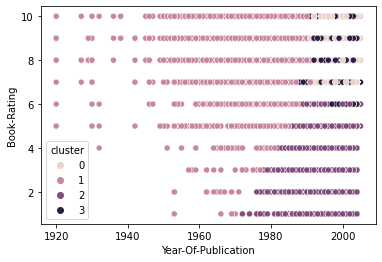

In [47]:
sns.scatterplot(ratings, x = 'Year-Of-Publication', y = 'Book-Rating', hue = 'cluster')

<Axes: xlabel='User-Age', ylabel='Book-Rating'>

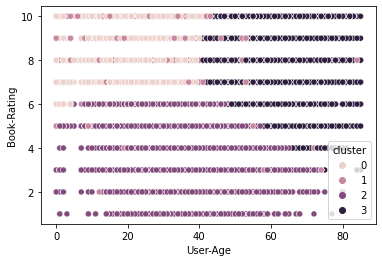

In [49]:
sns.scatterplot(ratings, x = 'User-Age', y = 'Book-Rating', hue = 'cluster')

In [50]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [53]:
columns_to_standardize = ['Book-Rating', 'Year-Of-Publication', 'User-Age']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
ratings[columns_to_standardize] = scaler.fit_transform(ratings[columns_to_standardize])

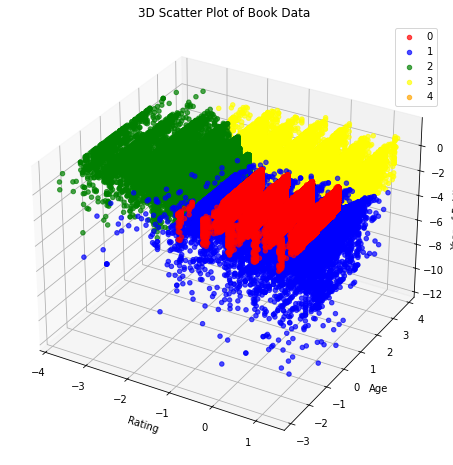

In [54]:
# Set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each group (you can customize this based on your groups)
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange'}

# Iterate over each group and plot the points
for group, color in colors.items():
    group_data = ratings[ratings['cluster'] == group]
    ax.scatter(group_data['Book-Rating'], group_data['User-Age'], group_data['Year-Of-Publication'], c=color, label=group, alpha=0.7)

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Age')
ax.set_zlabel('Year of Publication')
ax.set_title('3D Scatter Plot of Book Data')

# Add legend
ax.legend()

# Show plot
plt.show()

In [55]:
from sklearn.decomposition import PCA

In [57]:
# Create a PCA instance with desired number of components
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization

# Apply PCA to the scaled data
pca_result = pca.fit_transform(ratings[columns_to_standardize])

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [61]:
ratings = pd.merge(ratings,df_pca, left_index=True, right_index=True)

In [62]:
# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.36471808 0.32997936]


<Axes: xlabel='PC1', ylabel='PC2'>

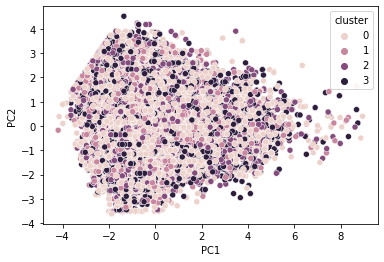

In [63]:
# Plot PCA results
sns.scatterplot(ratings, x = 'PC1', y = 'PC2', hue = 'cluster')

In [51]:
df

,Book-Rating,Year-Of-Publication,User-Age,group,PC1,PC2
0,-0.401765,0.673457,2.048421,2,-1.703584,-1.196972
1,0.156593,0.372668,-1.369527,0,0.512285,0.880914
2,-1.518480,-0.078514,-0.336194,3,-0.566142,1.293808
3,-1.518480,-0.680091,-0.892604,3,0.129065,1.692952
4,-0.401765,-0.078514,0.061242,0,-0.185392,0.233756
...,...,...,...,...,...,...
203958,-0.960123,0.372668,-1.210553,3,1.220663,-0.008236
203959,-0.960123,0.222274,-1.210553,3,-0.459782,1.541260
203960,-0.401765,0.974245,-1.210553,0,0.147595,1.365306
203961,-0.960123,0.222274,-1.210553,3,-0.185492,0.982002


In [52]:
ratings = ratings.merge(df, left_index= True, right_index= True)

In [53]:
ratings

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication_x,Book-Publisher,Book-Info,Book-Vector,Unnamed: 0,User-City,User-State,User-Country,User-Age_x,Book-Rating_y,Year-Of-Publication_y,User-Age_y,group,PC1,PC2
0,276744,038550120X,7,painted house,john grisham,2001.0,doubleday,painted house by john grisham,[0. 0. 0. ... 0. 0. 0.],47901,torrance,california,usa,62.0,-0.401765,0.673457,2.048421,2,-1.703584,-1.196972
1,276754,0684867621,8,girl loved tom gordon novel,stephen king,1999.0,scribner,girl loved tom gordon novel by stephen king,[0. 0. 0. ... 0. 0. 0.],47902,alberta beach,alberta,canada,19.0,0.156593,0.372668,-1.369527,0,0.512285,0.880914
2,276755,0451166892,5,pillar earth,ken follett,1996.0,signet books,pillar earth by ken follett,[0. 0. 0. ... 0. 0. 0.],47903,frankfurt am main,hessen,germany,32.0,-1.518480,-0.078514,-0.336194,3,-0.566142,1.293808
3,276762,0380711524,5,see jane run,joy fielding,1992.0,avon,see jane run by joy fielding,[0. 0. 0. ... 0. 0. 0.],47904,duisburg,NaN,germany,25.0,-1.518480,-0.680091,-0.892604,3,0.129065,1.692952
4,276772,0553572369,7,pay dirt mr murphy mystery paperback,rita mae brown,1996.0,bantam,pay dirt mr murphy mystery paperback by rita m...,[0. 0. 0. ... 0. 0. 0.],47905,bonn,NaN,germany,37.0,-0.401765,-0.078514,0.061242,0,-0.185392,0.233756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203958,276487,840147468X,6,rabia,stephen king,1999.0,plaza & janes editores s a,rabia by stephen king,[0. 0. 0. ... 0. 0. 0.],47864,teruel,aragon,spain,21.0,-0.960123,0.372668,-1.210553,3,1.220663,-0.008236
203959,276487,8420725927,6,lazarillo de tormes biblioteca didactica anaya,anonimo,1998.0,continental book company,lazarillo de tormes biblioteca didactica anaya...,[0. 0. 0. ... 0. 0. 0.],47864,teruel,aragon,spain,21.0,-0.960123,0.222274,-1.210553,3,-0.459782,1.541260
203960,276487,8432216062,7,el perfume historia de un asesino,patrick suskind,2003.0,editorial seix barral s a,el perfume historia de un asesino by patrick s...,[0. 0. 0. ... 0. 0. 0.],47864,teruel,aragon,spain,21.0,-0.401765,0.974245,-1.210553,0,0.147595,1.365306
203961,276487,8434850915,6,moriras en chafarinas,fernando lalana,1998.0,s & m books,moriras en chafarinas by fernando lalana,[0. 0. 0. ... 0. 0. 0.],47864,teruel,aragon,spain,21.0,-0.960123,0.222274,-1.210553,3,-0.185492,0.982002


In [56]:
ratings[ratings['Book-Author'] == 'harper lee'].groupby('group').count()

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication_x,Book-Publisher,Book-Info,Book-Vector,Unnamed: 0,User-City,User-State,User-Country,User-Age_x,Book-Rating_y,Year-Of-Publication_y,User-Age_y,PC1,PC2
group,,,,,,,,,,,,,,,,,,,
0,23,23,23,23,23,23,23,23,23,23,22,22,23,23,23,23,23,23,23
1,210,210,210,210,210,210,210,210,210,210,210,200,210,210,210,210,210,210,210
2,12,12,12,12,12,12,12,12,12,12,11,12,12,12,12,12,12,12,12
3,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [333]:
books_ratings.sort_values('Year-Of-Publication', ascending = False)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,index,average_rating,times_read,average_age,weighted_ratings,group,PC1,PC2
13658,0140622454,woman importance penguin popular classic,oscar wilde,2005.0,penguin books ltd,woman importance penguin popular classic by os...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3375,8.500000,6,-1.643271,0.789747,2,-1.720404,0.603533
11555,1881273156,five love language five love language,gary chapman,2005.0,moody publishers,five love language five love language by gary ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1319,8.437500,16,-0.006070,1.367866,2,-0.971520,-0.962935
1762,0140124373,red dwarf,grant naylor,2005.0,penguin books ltd,red dwarf by grant naylor,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3085,8.230769,13,-0.267266,0.878218,2,-0.809979,-0.432008
16508,0886777992,alien shore,c s friedman,2004.0,daw books,alien shore by c s friedman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7663,7.875000,8,0.523511,0.225198,0,0.210939,-0.529417
9406,0140143882,last human red dwarf,doug naylor,2004.0,penguin books ltd,last human red dwarf by doug naylor,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4238,8.285714,7,-1.271427,0.651106,2,-1.359437,0.438633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,0448095017,secret old clock nancy drew mystery story 1,carolyn keene,1930.0,grosset & dunlap,secret old clock nancy drew mystery story 1 by...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3938,8.045455,22,-0.467684,0.750519,2,-0.861399,-0.199995
13527,0684717972,farewell arm,ernest hemingway,1929.0,charles scribners sons,farewell arm by ernest hemingway,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1900,8.625000,8,-0.577187,1.116709,2,-1.197765,-0.381499
14483,0448089033,secret old mill hardy boy mystery story book 3,franklin w dixon,1927.0,grosset & dunlap,secret old mill hardy boy mystery story book 3...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3333,8.500000,6,0.571969,0.789747,0,-0.153993,-0.962879
3929,0684717603,great gatsby scribner classic,f scott fritzgerald,1920.0,scribner paper fiction,great gatsby scribner classic by f scott fritz...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5053,8.100000,10,-0.286437,0.567998,2,-0.604177,-0.199094


In [336]:
books_ratings.sort_values('weighted_ratings', ascending = False).head(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Info,Book-Vector,index,average_rating,times_read,average_age,weighted_ratings,group,PC1,PC2
2619,0439139597,harry potter goblet fire book 4,j k rowling,2000.0,scholastic,harry potter goblet fire book 4 by j k rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,9.311111,135,-0.719024,5.807226,2,-4.614756,-3.597902
2075,0345339738,return king lord ring part 3,j r r tolkien,1986.0,del rey,return king lord ring part 3 by j r r tolkien,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,9.397260,73,-0.940767,5.519015,2,-4.567756,-3.237310
2652,043935806X,harry potter order phoenix book 5,j k rowling,2003.0,scholastic,harry potter order phoenix book 5 by j k rowling,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,9.024510,204,-0.779165,4.984478,2,-4.075511,-2.973605
3025,0439136369,harry potter prisoner azkaban book 3,j k rowling,2001.0,scholastic,harry potter prisoner azkaban book 3 by j k ro...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,9.068702,131,-0.606674,4.909660,2,-3.900637,-3.042670
1912,0439136350,harry potter prisoner azkaban book 3,j k rowling,1999.0,scholastic,harry potter prisoner azkaban book 3 by j k ro...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,9.035461,141,-0.726539,4.834715,2,-3.932400,-2.904919
15835,0439425220,harry potter chamber secret postcard book,j k rowling,2002.0,scholastic,harry potter chamber secret postcard book by j...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,9.869565,23,-0.593440,4.824761,2,-3.831247,-2.991996
1136,059035342X,harry potter sorcerer stone harry potter paper...,j k rowling,1999.0,arthur a levine books,harry potter sorcerer stone harry potter paper...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,8.938312,308,-0.686100,4.801412,2,-3.880257,-2.909965
428,0345339711,two tower lord ring part 2,j r r tolkien,1986.0,del rey,two tower lord ring part 2 by j r r tolkien,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,9.135802,81,-0.794096,4.765536,2,-3.931254,-2.808232
5468,0618002235,two tower lord ring part 2,j r r tolkien,1999.0,houghton mifflin company,two tower lord ring part 2 by j r r tolkien,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8,9.791667,24,-0.653336,4.742535,2,-3.815457,-2.891501
12,0446310786,kill mockingbird,harper lee,1988.0,little brown and company,kill mockingbird by harper lee,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9,8.946078,204,-0.902143,4.687308,2,-3.952339,-2.676515
